<a href="https://colab.research.google.com/github/jungddddd/ML2/blob/main/2)%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EB%B6%84%EB%A5%9803_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SVM
#### iris 분류

In [ ]:
# 필요한 모듈 불러오기
# numpy와 matplotlib 모듈 불러오기
# Scikit-learn 의 datasets 모듈 불러오기
# sklearn.model_selection 의 train_test_split 함수 불러오기
# sklearn.metrics 모듈의 confusion_matrix 함수와 accuracy_score 함수 불러오기
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# datasets의 load_iris() 함수사용
# iris 데이터를 불러와 iris 변수에 할당
iris = datasets.load_iris()

In [ ]:
# iris 의 data 중 꽃받침(sepal)의 길이와 너비 선택 하여 x_data로 할당
# iris 의 target 을 y_data 로 할당
x_data = iris.data[:,:2] #꽃받침(sepal)의 길이와 너비
y_data = iris.target

In [ ]:
# 데이터 확인
print("x_data\n", x_data[:5])
print("y_data\n", y_data[:5])

x_data
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
y_data
 [0 0 0 0 0]


In [ ]:
# train_test_split() 함수 이용해 데이터 분할
# train, test 데이터 분할 확인
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size = 0.3,
                                                    random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 2) (45, 2) (105,) (45,)


In [ ]:
# svm 모델 생성
# sklearns 모듈의 svm 사용
from sklearn import svm

In [ ]:
# svm 모델 생성
# svm의 svc() 함수에 kervel 파라미터를 linear로 지정
# fit 함수 이용해 train 데이터로 학습 시킴
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
# 생성된 모델에 test 데이터를 넣어 예측
# 예측된 값은 y_pred 변수에 할당
y_pred = clf.predict(x_test)

In [ ]:
# 실제값인 y_test 와 예측값인 y_pred 를 비교
# confusion_matrix() 함수를 이용
cfmat = confusion_matrix(y_test,y_pred)
print(cfmat)

[[17  0  0]
 [ 0  9  3]
 [ 0  6 10]]


In [ ]:
# 실제값인 y_test 와 예측값인 y_pred 를 비교
# accuracy_score() 함수 이용
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8


- #### linear

In [ ]:
# svm의 LinearSVC() 함수 사용
# fit 함수 이용해 train 데이터로 학습 시킴
# 생성된 모델에 test 데이터를 넣어 예측
# 예측된 값은 y_pred_lin 변수에 할당
# 실제값인 y_test 와 예측값인 y_pred_lin 를 비교하여 confusion_matrix 와 accuracy_matrix 출력
clf_lin = svm.LinearSVC()
clf_lin.fit(x_train,y_train)

y_pred_lin = clf_lin.predict(x_test)

print(confusion_matrix(y_test,y_pred_lin))
print(accuracy_score(y_test, y_pred_lin))

[[17  0  0]
 [ 0  7  5]
 [ 0  6 10]]
0.7555555555555555


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


- #### radial basis function(RBF)

In [ ]:
# svm의 svc() 함수에 kervel 파라미터를 rbf로 지정. gamma는 0.5로 지정
# fit 함수 이용해 train 데이터로 학습 시킴
# 생성된 모델에 test 데이터를 넣어 예측
# 예측된 값은 y_pred_rbf 변수에 할당
# 실제값인 y_test 와 예측값인 y_pred_rbf 를 비교하여 confusion_matrix 와 accuracy_matrix 출력
clf_rbf = svm.SVC(kernel='rbf', gamma=0.5)
clf_rbf.fit(x_train,y_train)

y_pred_rbf = clf_rbf.predict(x_test)

print(confusion_matrix(y_test,y_pred_rbf))
print(accuracy_score(y_test, y_pred_rbf))

[[17  0  0]
 [ 0  9  3]
 [ 0  6 10]]
0.8


- #### polynomial kernel

In [ ]:
# svm의 svc() 함수에 kervel 파라미터를 poly로 지정. degree는 3으로 지정
# fit 함수 이용해 train 데이터로 학습 시킴
# 생성된 모델에 test 데이터를 넣어 예측
# 예측된 값은 clf_poly 변수에 할당
# 실제값인 y_test 와 예측값인 clf_poly 를 비교하여 confusion_matrix 와 accuracy_matrix 출력
clf_poly = svm.SVC(kernel='poly',degree=3)
clf_poly.fit(x_train, y_train)

y_pred_poly = clf_poly.predict(x_test)

print(confusion_matrix(y_test, y_pred_poly))
print(accuracy_score(y_test, y_pred_poly))

[[17  0  0]
 [ 0  9  3]
 [ 0  7  9]]
0.7777777777777778


- #### 시각화

In [ ]:
# 시각화를 하기위한 함수 정의
# make_meshgrid() 함수로 도표의 x축, y축 범위 지정
# plot_contours() 함수로 contourplot(등고선도) 도식화
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

- 데이터 불러오기

In [ ]:
"""x_data = iris.data[:,:2] #꽃받침(sepal)의 길이와 너비
y_data = iris.target

x_train, x_test, y_train, y_test"""

- 모델정의 및 피팅

In [ ]:
# 시각화할 4개의 svm 모델을 models 로 할당
# 모델을 생성해 fit 함수 이용해 train 데이터로 학습 시킴
models = (svm.SVC(kernel='linear'),
          svm.LinearSVC(),
          svm.SVC(kernel='rbf', gamma=0.5),
          svm.SVC(kernel='poly', degree=3))
models = (clf.fit(x_train, y_train) for clf in models)

In [ ]:
# 모델이 지정된 순서대로 도표의 제목을 지정하여 titles 로 할당
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


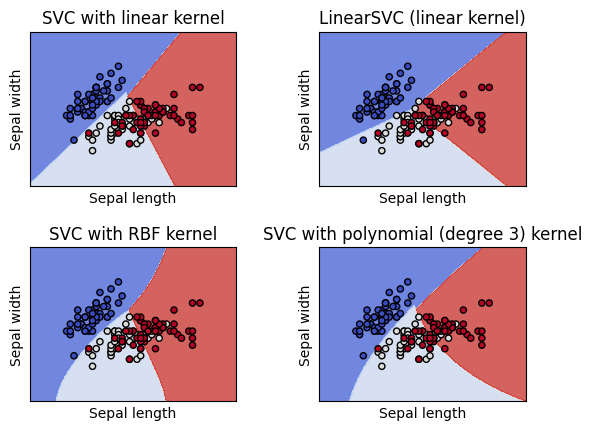

In [ ]:
# 2 X 2 형으로 plot 생성, plot 사이 공백 지정
# x축, y축 데이터 지정하여 X0, X1 로 할당
# make_meshgrid() 함수에  X0, X1 데이터로 도표의 x축, y축 범위 지정
# countours() 함수로 등고선도 생성
# scatter() 함수로 산점도 도식화
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_data[:, 0], x_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

- LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

### <과제> svm 을 이용
#### 와인 등급을 분류하는 모델을 kenel을 이용해 만들고, 모델 성능을 평가하시오.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets
from sklearn import svm

In [ ]:
wine = datasets.load_wine()
print(wine.DESCR)

In [ ]:
x_data = wine.data[:, [0, 9]] #'alcohol', 'color_intensity'
y_data = wine.target

In [ ]:
wine.feature_names

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size = 0.3,
                                                    random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
#linear
clf_lin = svm.LinearSVC()
clf_lin.fit(x_train,y_train)

y_pred_lin = clf_lin.predict(x_test)

print(confusion_matrix(y_test,y_pred_lin))
print(accuracy_score(y_test, y_pred_lin))

In [ ]:
#rbf
clf_rbf = svm.SVC(kernel = 'rbf', gamma = 0.7)
clf_rbf.fit(x_train,y_train)

y_pred_rbf = clf_rbf.predict(x_test)

print(confusion_matrix(y_test,y_pred_rbf))
print(accuracy_score(y_test, y_pred_rbf))

In [ ]:
#poly
clf_poly = svm.SVC(kernel='poly',degree=3)
clf_poly.fit(x_train, y_train)

y_pred_poly = clf_poly.predict(x_test)

print(confusion_matrix(y_test, y_pred_poly))
print(accuracy_score(y_test, y_pred_poly))

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
#C = 1.0 #Regularization parameter
models = (svm.SVC(kernel='linear'),
          svm.LinearSVC(),
          svm.SVC(kernel='rbf', gamma=0.7),
          svm.SVC(kernel='poly', degree=3))
models = (clf.fit(x_train, y_train) for clf in models)

In [ ]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

In [ ]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_data[:, 0], x_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('alc')
    ax.set_ylabel('colr')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(wine.data)
wine.data_nom = scaler.transform(wine.data)

x_train2, x_test2, y_train2, y_test2 = train_test_split(wine.data_nom, wine.target,
                                                        test_size = 0.3,
                                                        random_state = 103)
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)